In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2019-1st-ml-month-with-kakr/sample_submission.csv
/kaggle/input/2019-1st-ml-month-with-kakr/train.csv
/kaggle/input/2019-1st-ml-month-with-kakr/test.csv


In [3]:
sample = pd.read_csv('../input/2019-1st-ml-month-with-kakr/sample_submission.csv')
test = pd.read_csv('../input/2019-1st-ml-month-with-kakr/test.csv')
train = pd.read_csv('../input/2019-1st-ml-month-with-kakr/train.csv')

In [4]:
train["Cabin"].dropna()

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

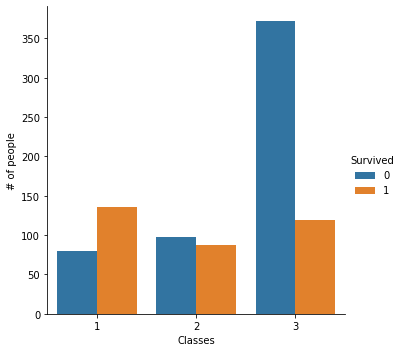

In [7]:
surv_by_class = sns.catplot(x = "Pclass", hue = "Survived", data = train, kind = "count", order = [1, 2, 3])
surv_by_class.set(xlabel = "Classes", ylabel = "# of people")

In [8]:
train_plot = train.groupby(["Pclass", "Survived"]).size().reset_index().pivot(columns = "Pclass", index = "Survived", values = 0)
train_plot.head()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Survived'>

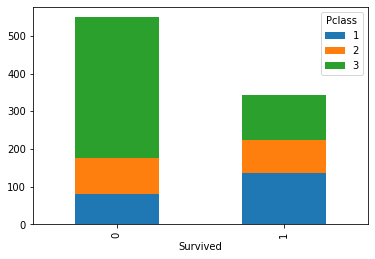

In [9]:
train_plot.plot(kind = 'bar', stacked = True)

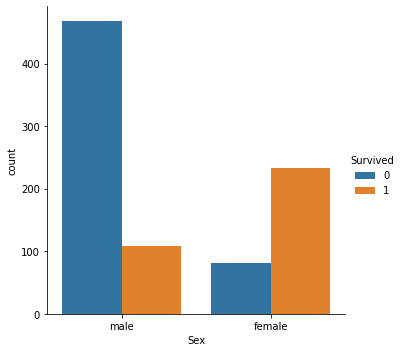

In [10]:
surv_by_sex = sns.catplot(x = "Sex", hue = "Survived", data = train, kind = "count")

In [11]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex'>

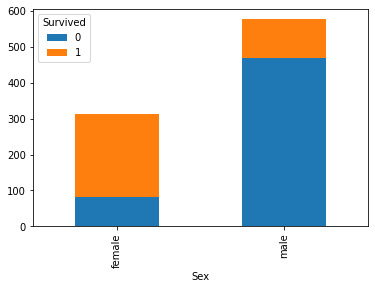

In [12]:
train_plot2 = train.groupby(["Survived", "Sex"]).size().reset_index().pivot(columns = "Survived", index = "Sex", values = 0)
train_plot2.plot(kind = "bar", stacked = True)

In [13]:
train["Age"].isnull().sum()

177

In [14]:
train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

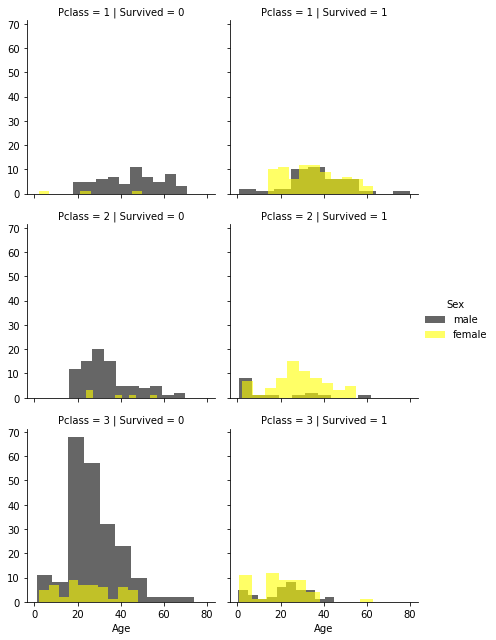

In [16]:
# 열은 생존여부, 행은 티켓 클래스 기준으로
# 색은 성별

hue_colors = {"male": "black", "female" : "yellow"}
age_class_surv = sns.FacetGrid(train, col='Survived', row='Pclass', hue="Sex", palette = hue_colors)
age_class_surv.map(plt.hist, 'Age', bins=10, alpha = 0.6)
age_class_surv.add_legend()
